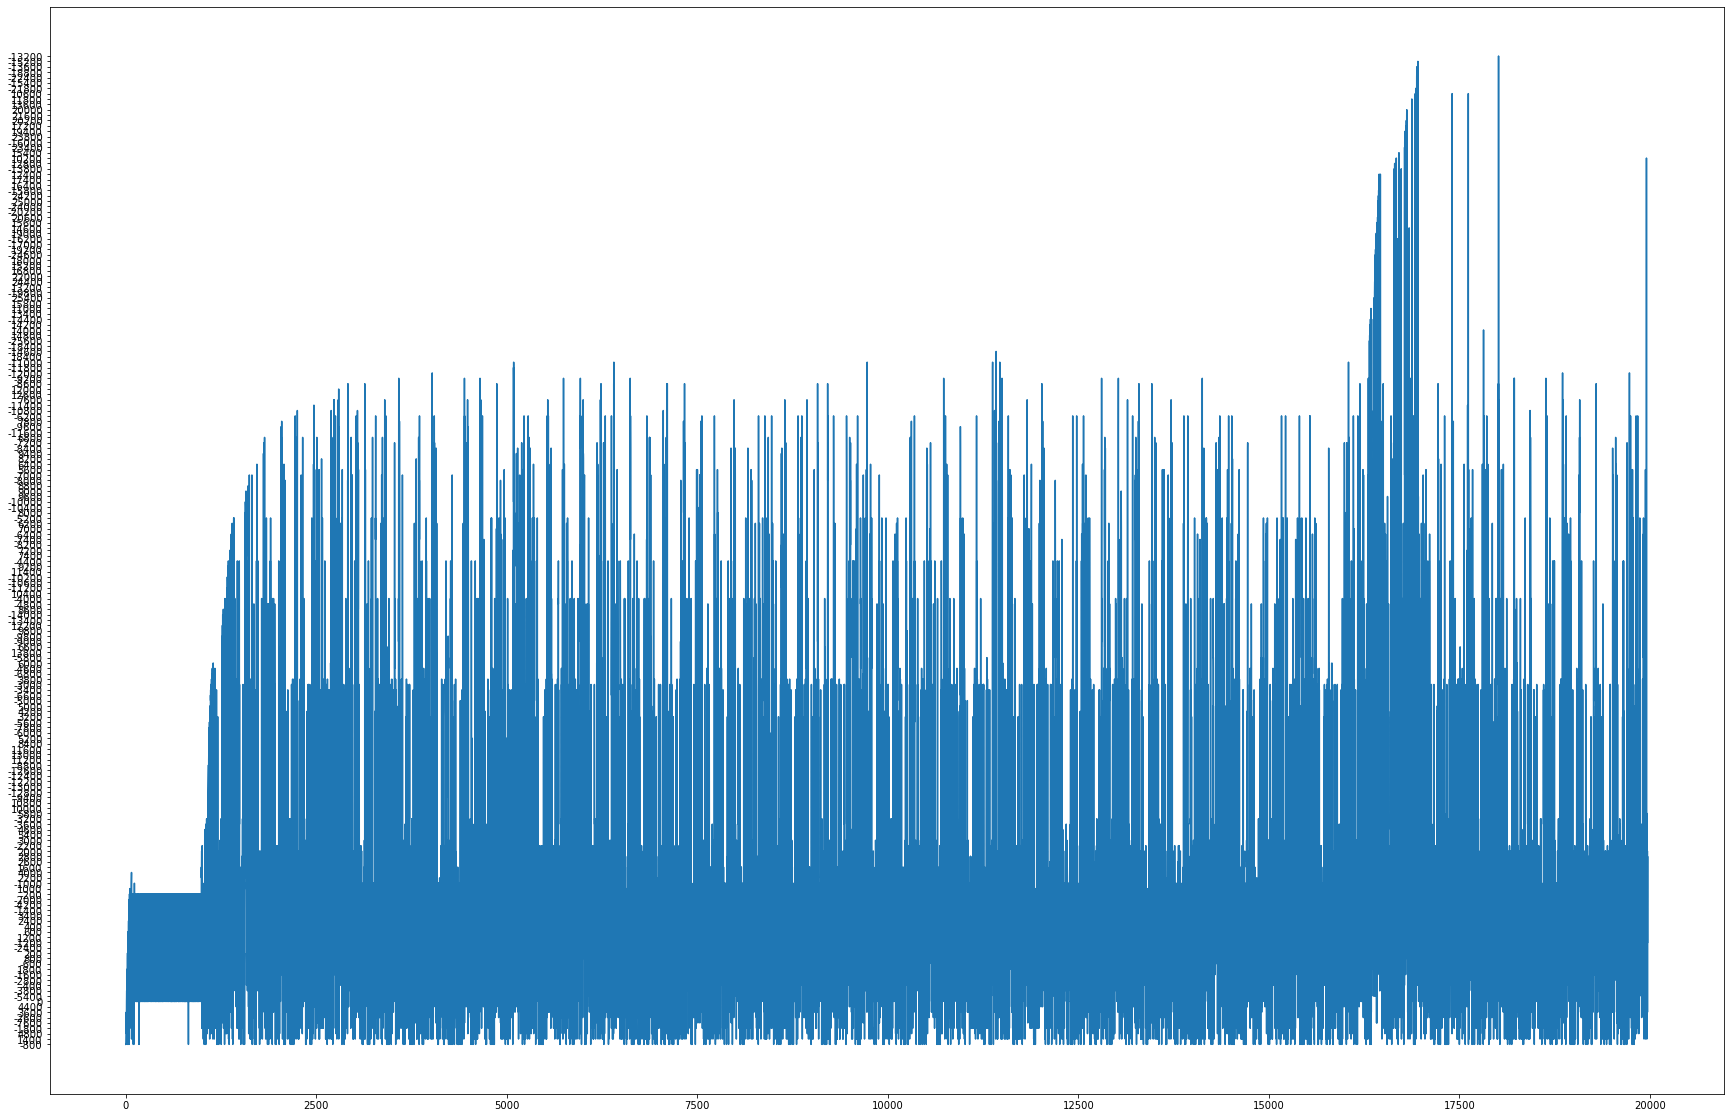

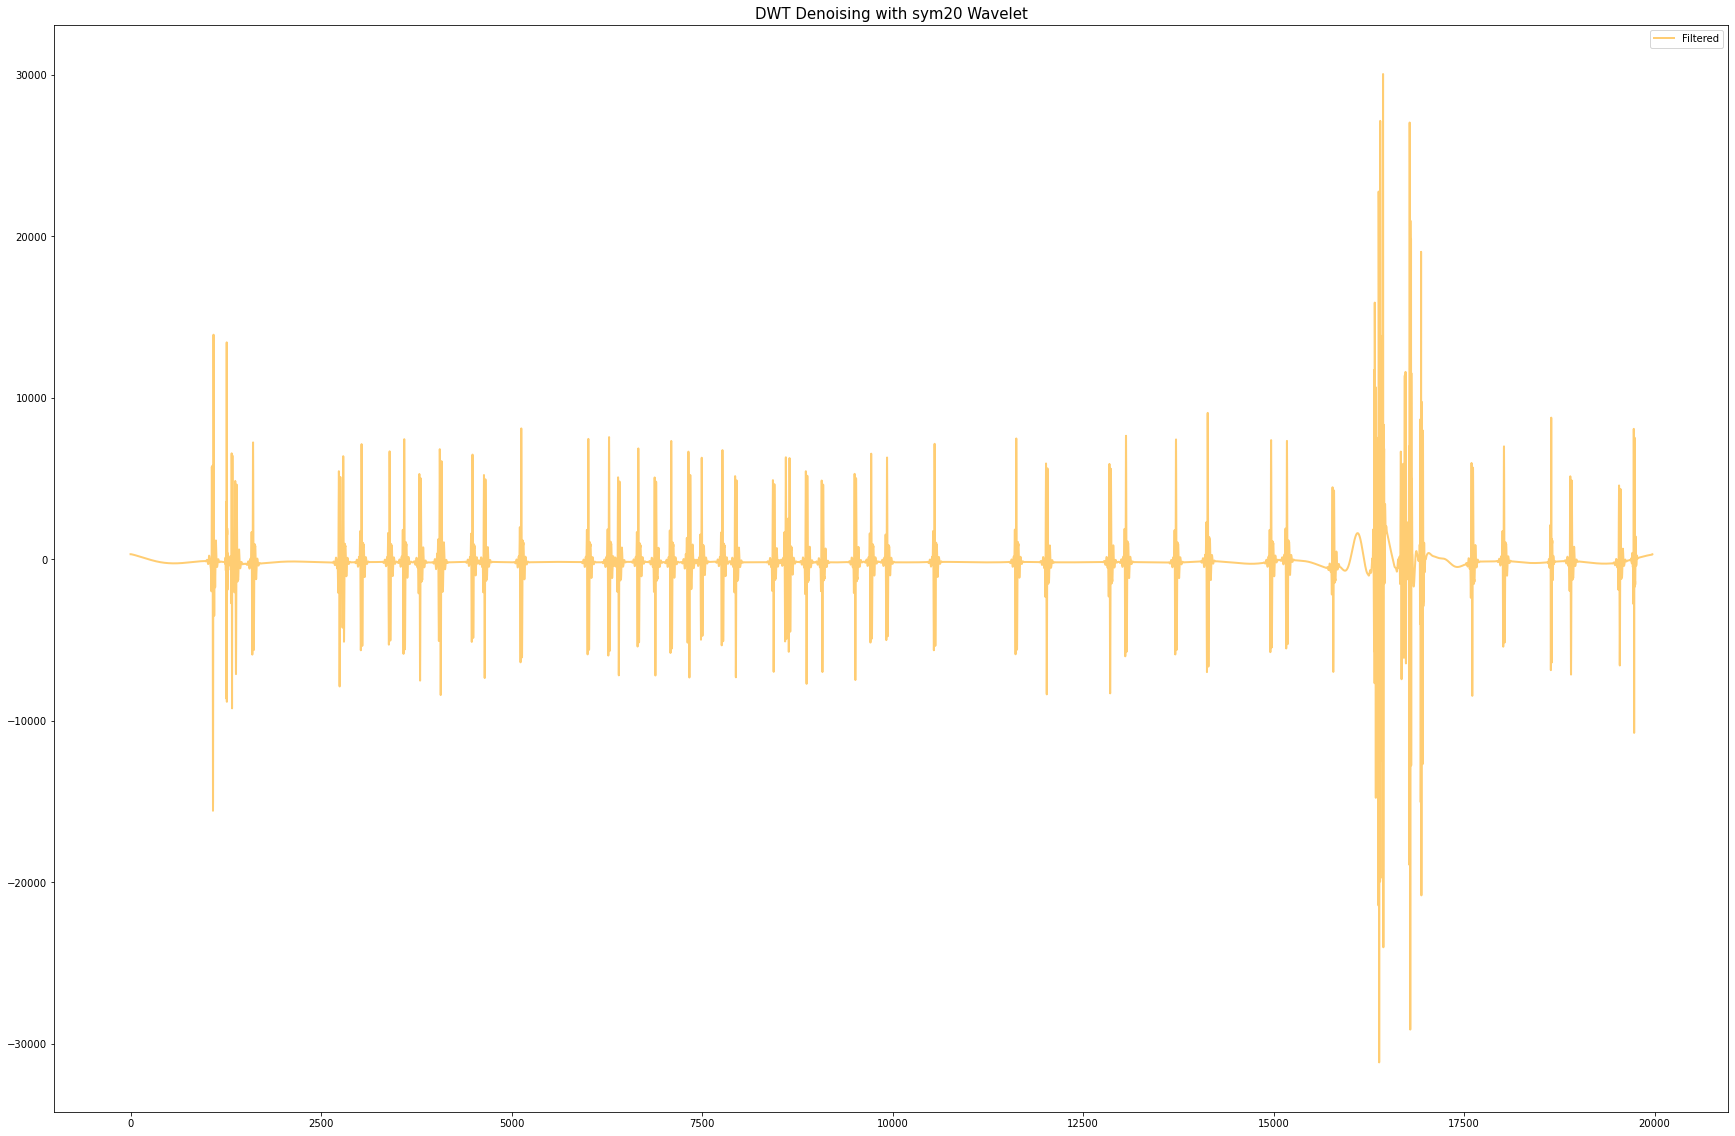

In [29]:
import pywt
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore")
overlapping = 0.550
columns = ["PCG"]
df = pd.read_csv('E:\Bhavya\KITSW\SEM 7\Major Project Phase 1\DataSet\PCG_P02_GW_31_till_end - PCG_P02_GW_31_till_end.csv', usecols=columns)
# n_times = 100
signal = df['PCG'][10:19982].values
plt.figure(figsize=(30, 20))
plt.plot(signal)
plt.show()



def madev(d, axis=None):
    """ Mean absolute deviation of a signal """
    return np.mean(np.absolute(d - np.mean(d, axis)), axis)

def wavelet_denoising(x, wavelet='db4', level=3):
    coeff = pywt.wavedec(x, wavelet, mode="per")
    sigma = (1/0.6745) * madev(coeff[-level])
    uthresh = sigma * np.sqrt(2 * np.log(len(x)))
    coeff[1:] = (pywt.threshold(i, value=uthresh, mode='hard') for i in coeff[1:])
    return pywt.waverec(coeff, wavelet, mode='per')

for wav in pywt.wavelist():
    try:
        filtered = wavelet_denoising(signal, wavelet=wav, level=3)
#         plt.plot(filtered,label='Filtered', color='orange', linewidth = 2)
    except:
        pass
filtered = wavelet_denoising(signal, wavelet=wav, level=3)  
signal = df['PCG'][10:19982].values
plt.figure(figsize=(30, 20))
# plt.plot(signal,label='Raw',color='blue',linewidth = 2, alpha = overlapping)
plt.plot(filtered, label='Filtered', color='orange', linewidth = 2 , alpha = overlapping)
plt.legend()
plt.title(f"DWT Denoising with {wav} Wavelet", size=15)
plt.show()

In [30]:
df.shape

(19981, 1)

In [31]:
filtered.shape

(19972,)

In [32]:
import numpy as np
import matplotlib.pyplot as plt

In [33]:
from scipy.fftpack import fft, fftfreq, ifft

In [34]:
spectrum = fft(filtered)

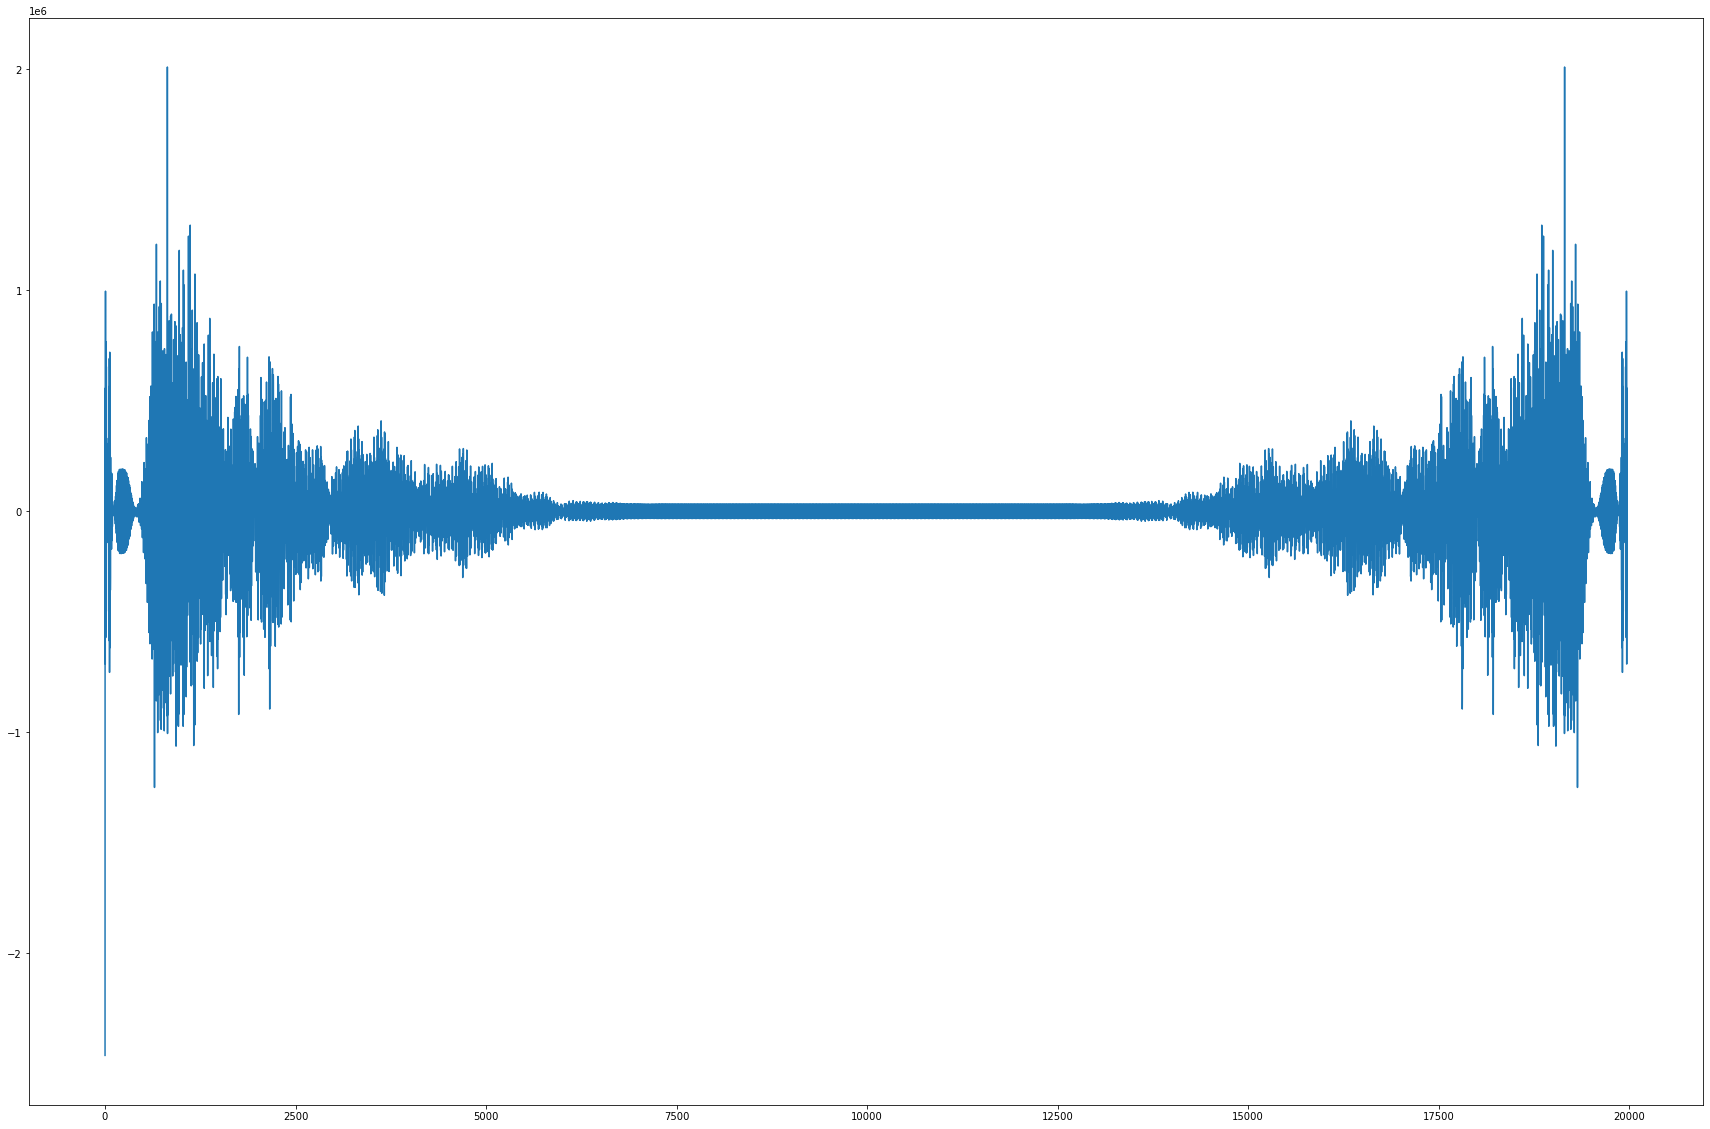

In [35]:
plt.figure(figsize=(30, 20))
plt.plot(spectrum)
plt.show()


In [36]:
N = 19972
Fs= 16000
F = fftfreq(N, 1/Fs)
fpositive = np.where(F>=0)

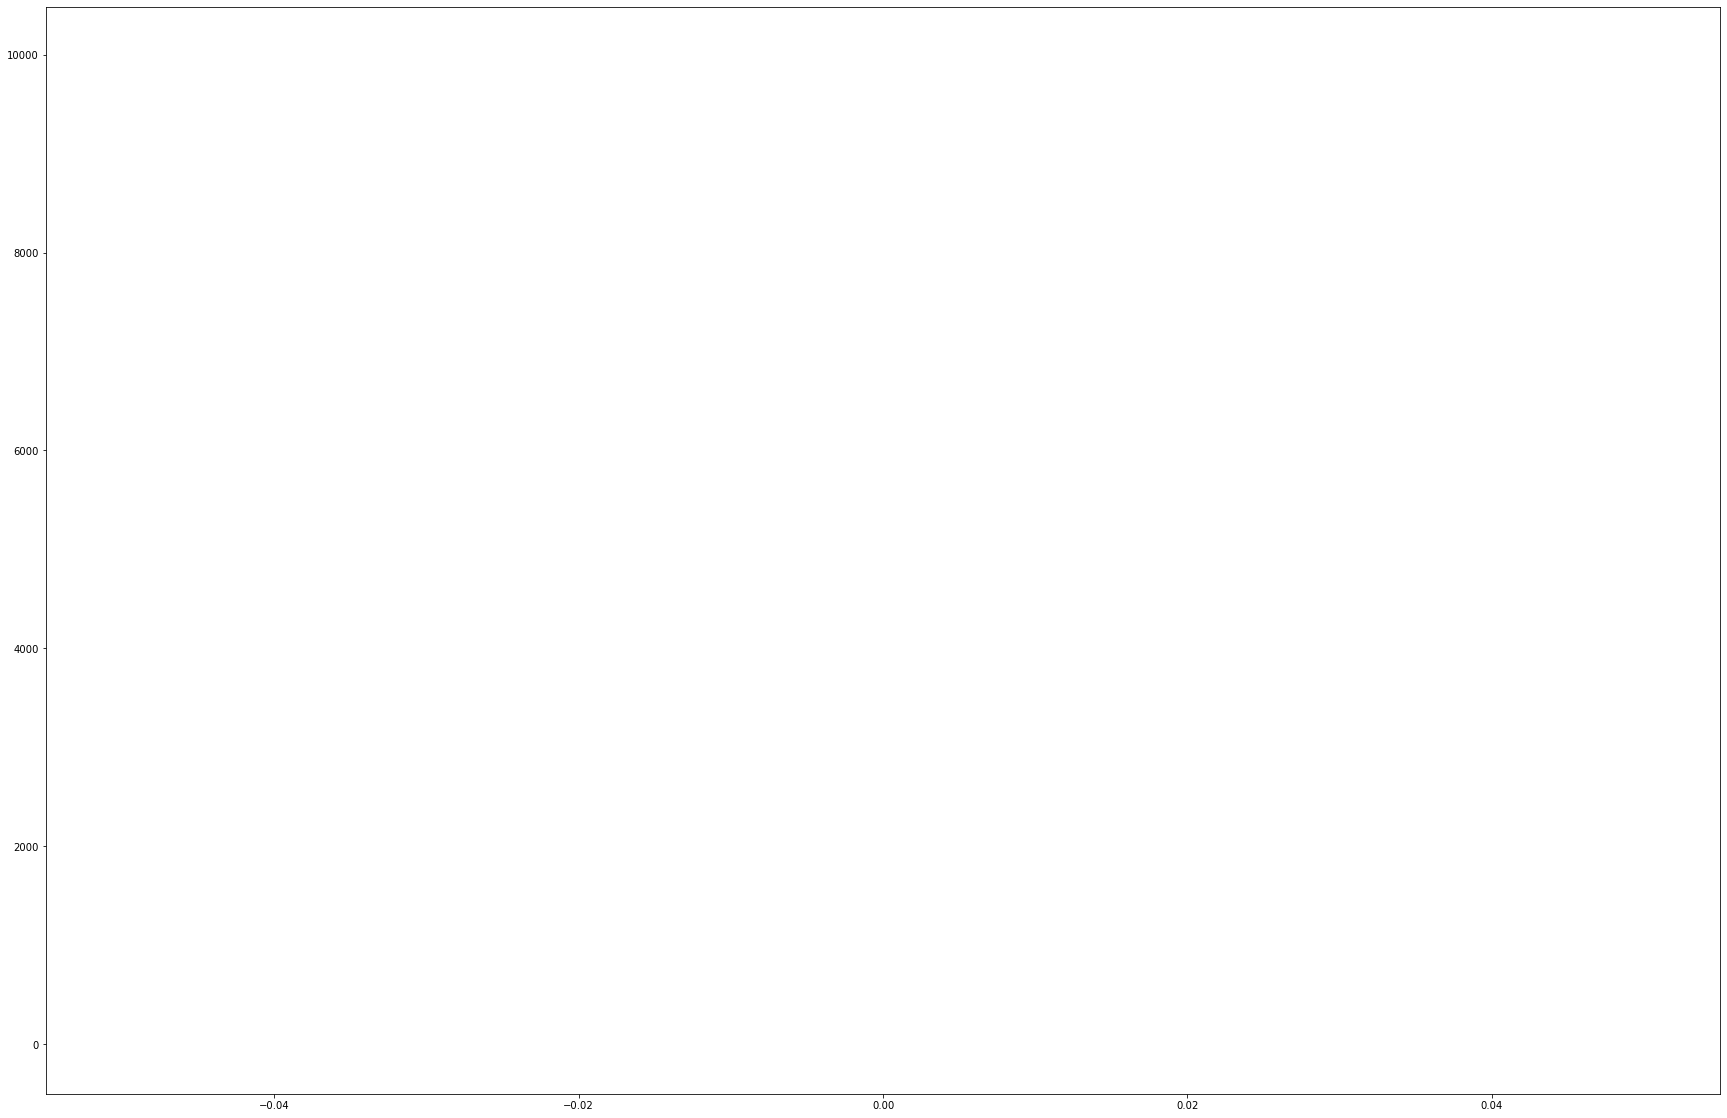

In [37]:
plt.figure(figsize=(30, 20))
plt.plot(fpositive)
plt.show()

In [38]:
fpositive

(array([   0,    1,    2, ..., 9983, 9984, 9985], dtype=int64),)

In [39]:
type(fpositive)

tuple

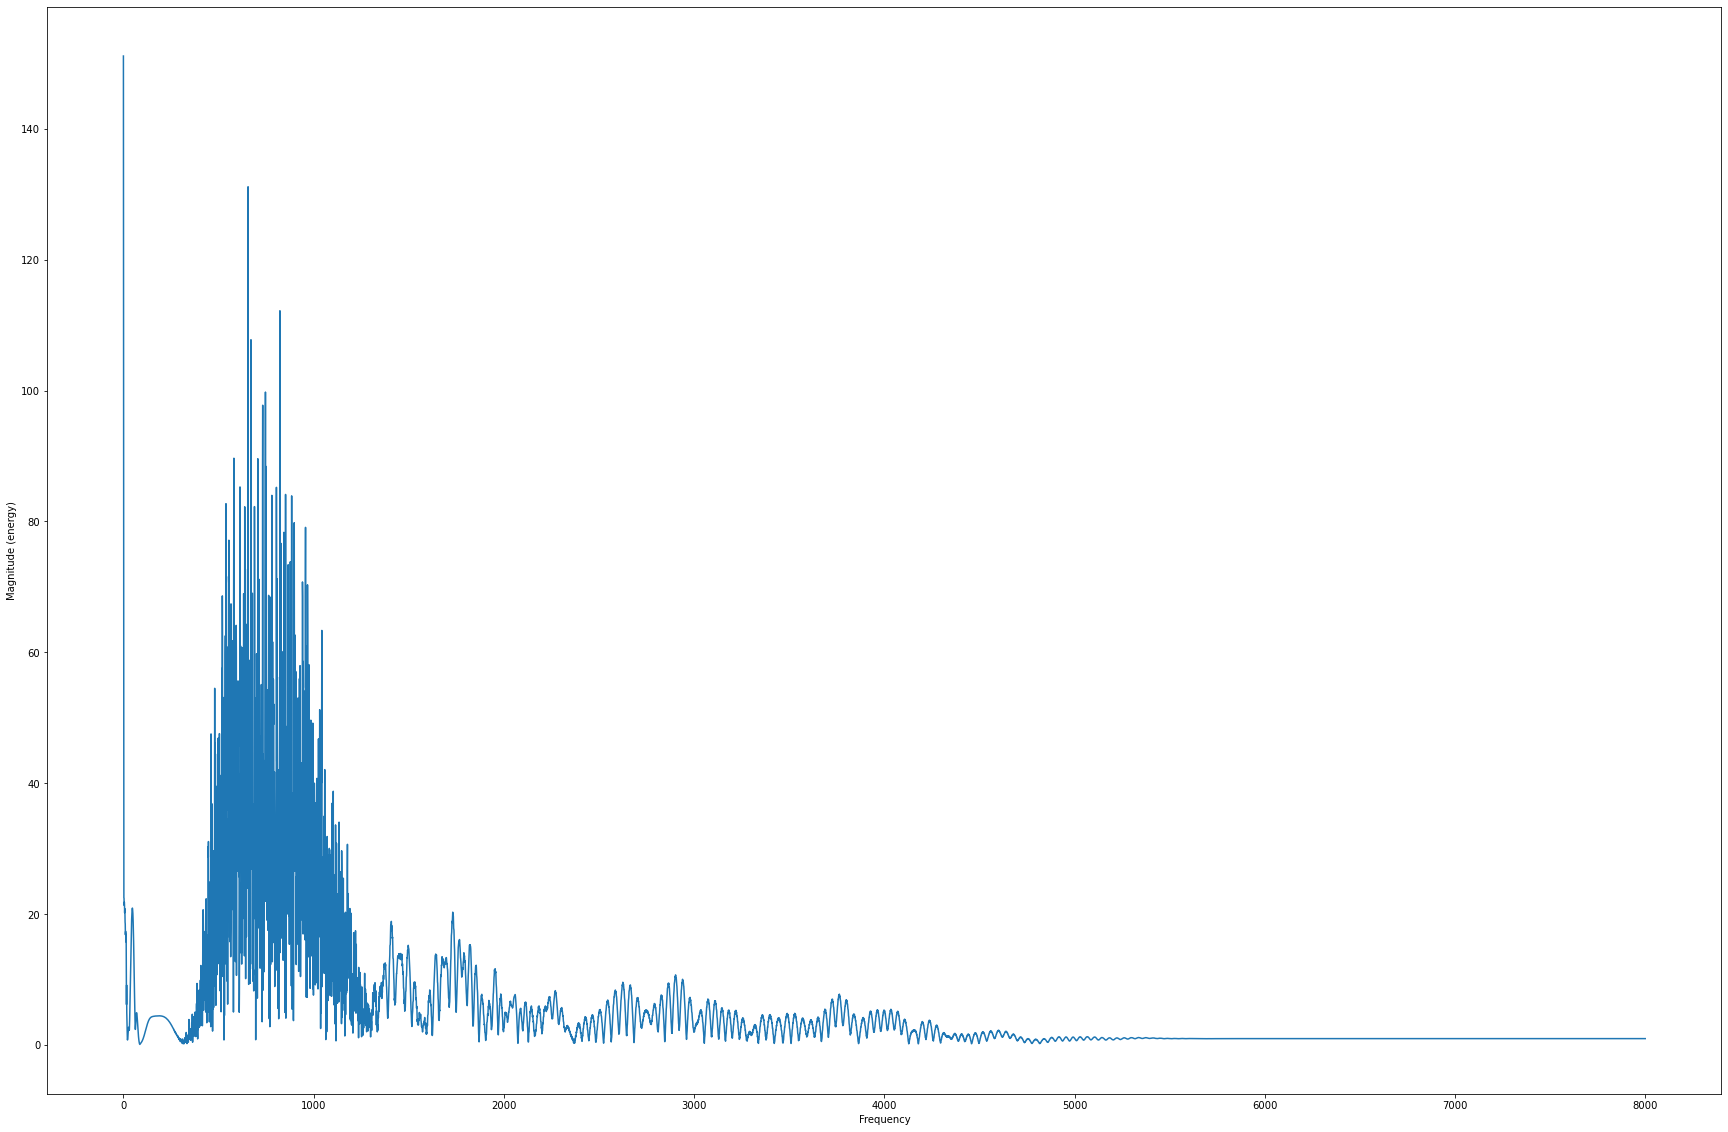

In [40]:
plt.figure(figsize=(30, 20))
plt.magnitude_spectrum(filtered,Fs=16000) 
plt.show()


# calculating the signal to noise ratio

In [41]:
import numpy as np   
def signaltonoise(filtered, axis=0, ddof=0):
    filtered = np.asanyarray(filtered)
    me = filtered.mean(axis)
    sd = filtered.std(axis=axis, ddof=ddof)
    return np.where(sd == 0, 0, me/sd)
print(signaltonoise(filtered,axis=0,ddof=0))

-0.07125793015596484


#### Here we got negative SNR, therefore, it means the signal power is low compared to the noise 

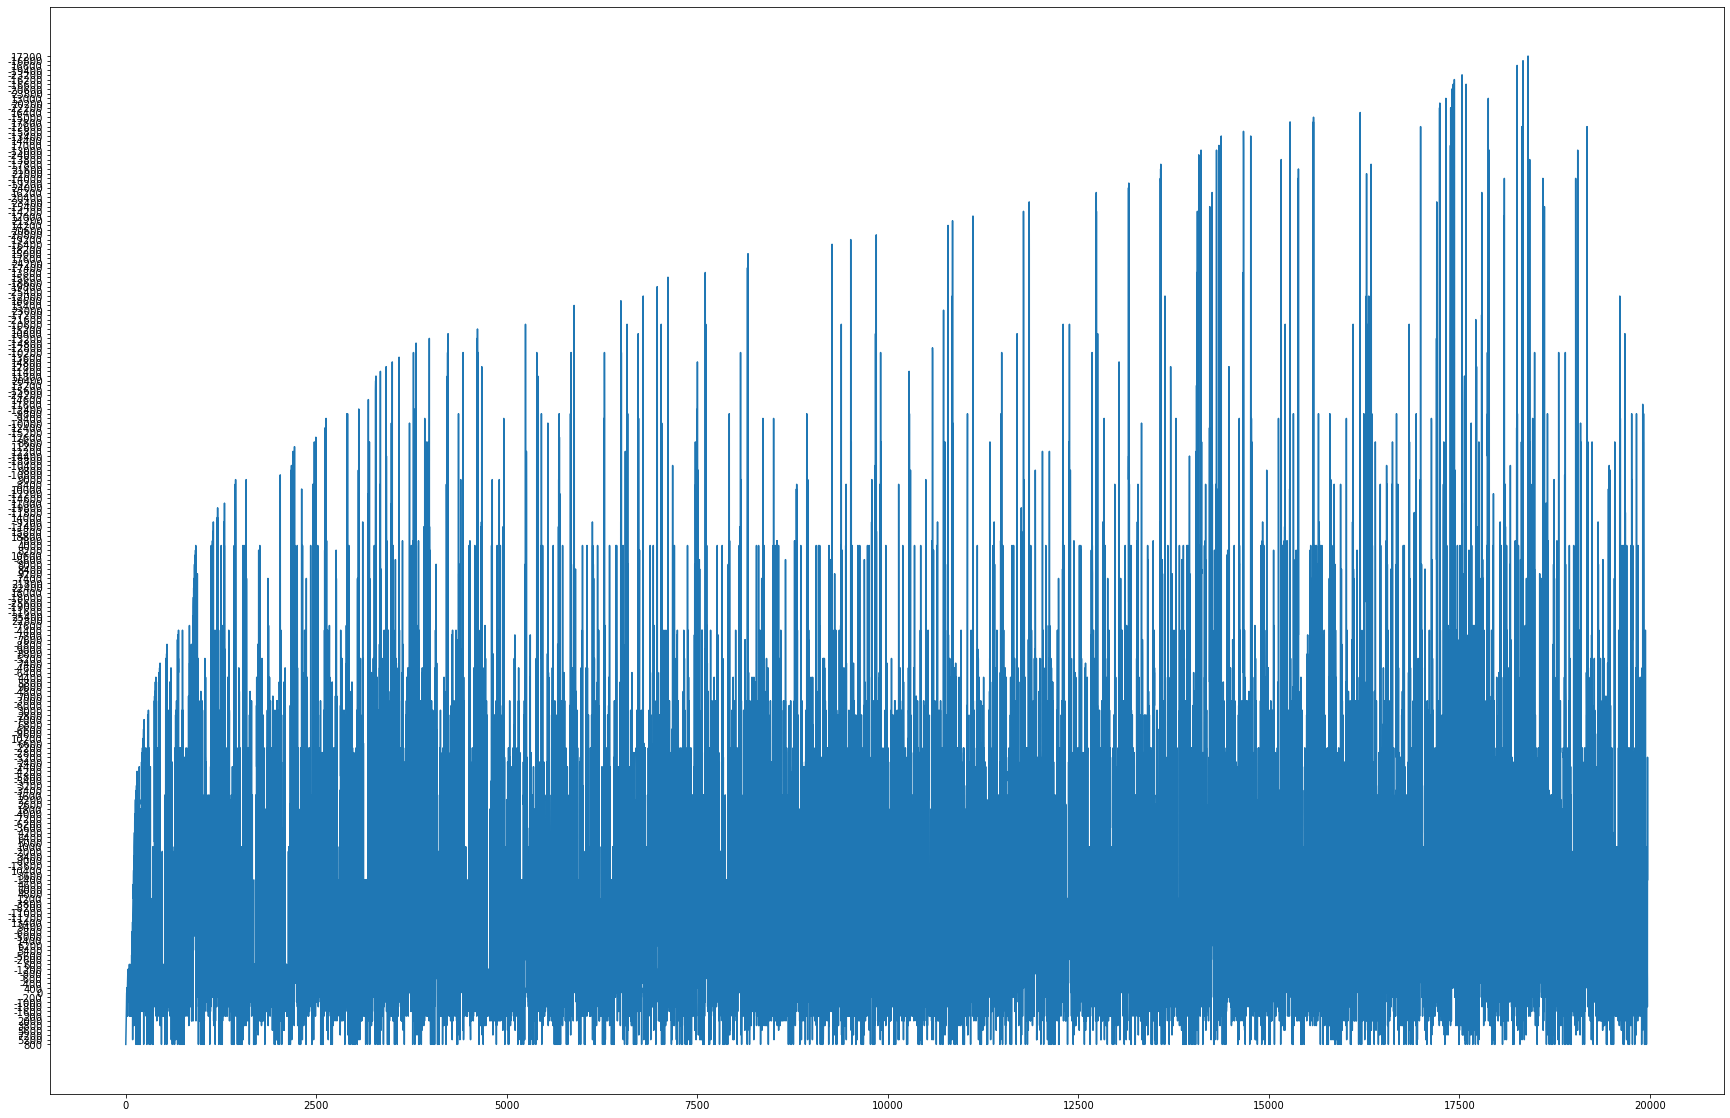

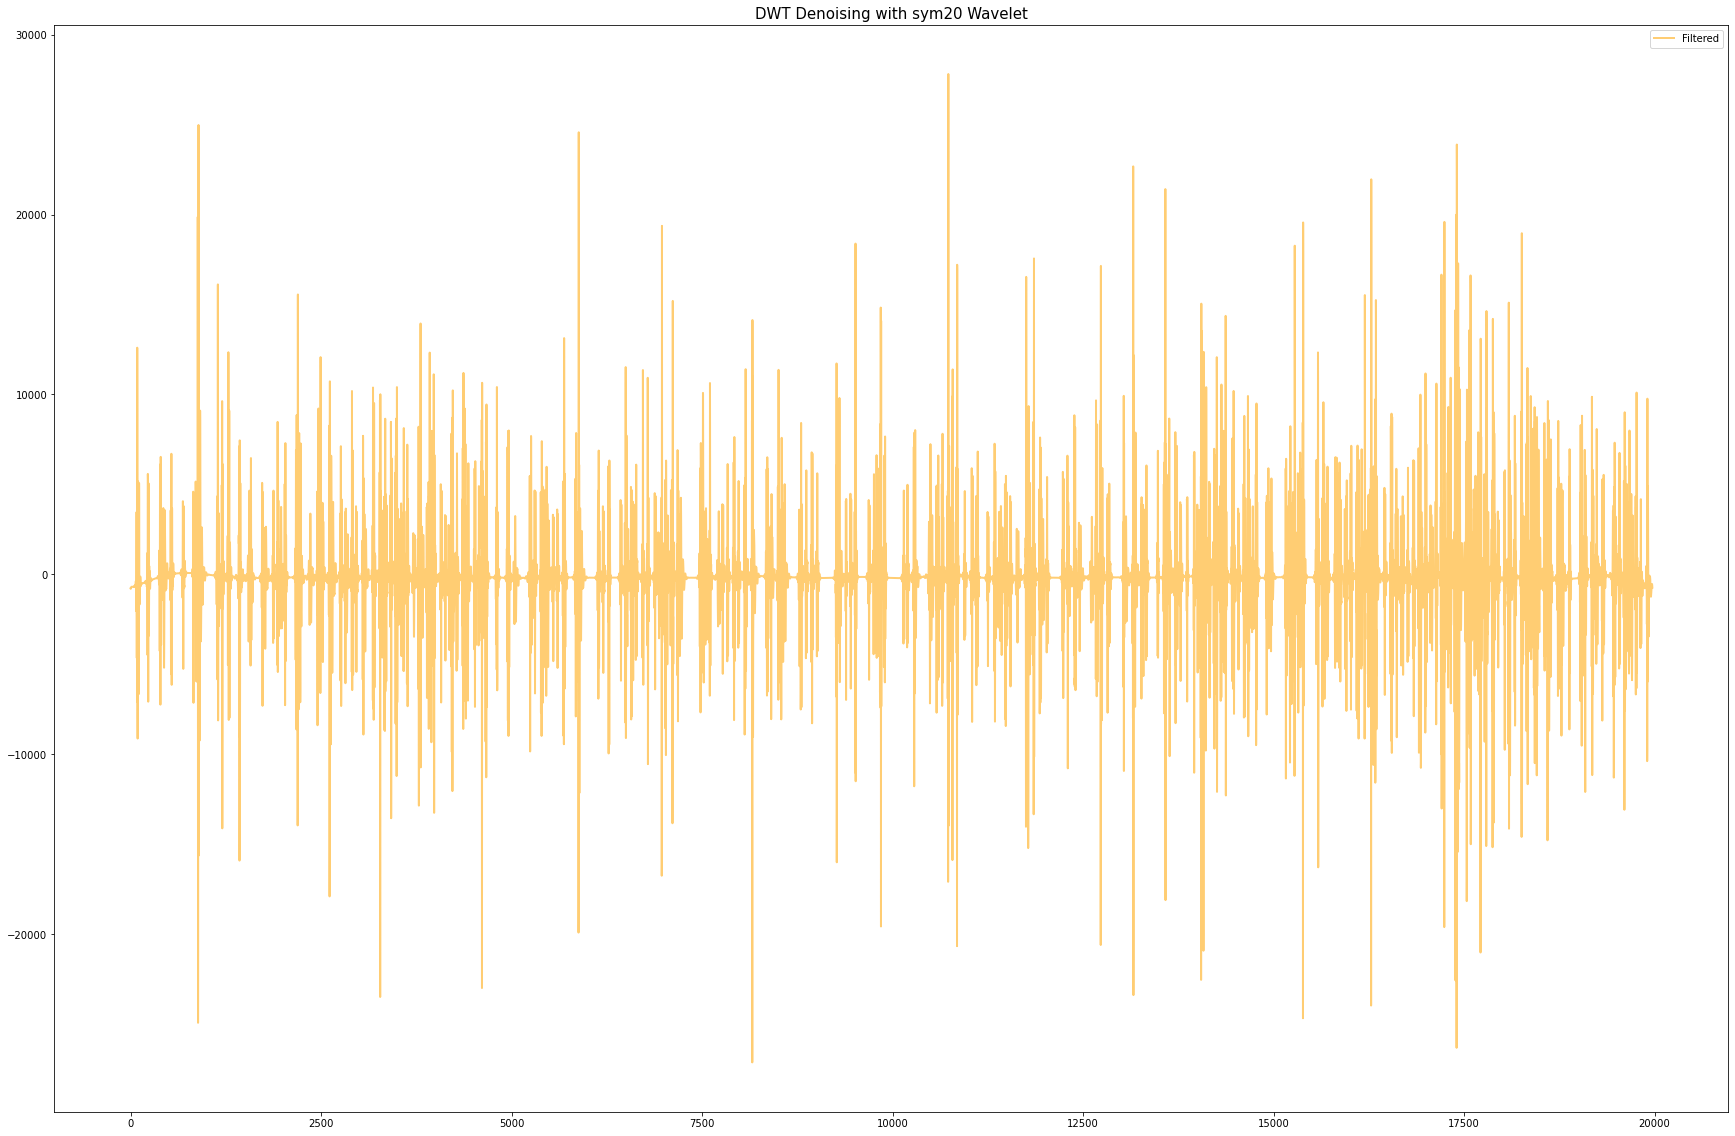

In [42]:
import pywt
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore")
overlapping = 0.550
columns = ["PCG"]
df = pd.read_csv('E:\Bhavya\KITSW\SEM 7\Major Project Phase 1\DataSet\PCG_P01_GW_36_1hour.csv', usecols=columns)
# n_times = 100
signal = df['PCG'][10:19982].values
plt.figure(figsize=(30, 20))
plt.plot(signal)
plt.show()



def madev(d, axis=None):
    """ Mean absolute deviation of a signal """
    return np.mean(np.absolute(d - np.mean(d, axis)), axis)

def wavelet_denoising(x, wavelet='db4', level=2):
    coeff = pywt.wavedec(x, wavelet, mode="per")
    sigma = (1/1.1830127) * madev(coeff[-level])
    uthresh = sigma * np.sqrt(2 * np.log(len(x)))
    coeff[1:] = (pywt.threshold(i, value=uthresh, mode='hard') for i in coeff[1:])
    return pywt.waverec(coeff, wavelet, mode='per')

for wav in pywt.wavelist():
    try:
        filtered3 = wavelet_denoising(signal, wavelet=wav, level=2)
#         plt.plot(filtered,label='Filtered', color='orange', linewidth = 2)
    except:
        pass
filtered3 = wavelet_denoising(signal, wavelet=wav, level=2)  
signal = df['PCG'][10:19982].values
plt.figure(figsize=(30, 20))
# plt.plot(signal,label='Raw',color='blue',linewidth = 2, alpha = overlapping)
plt.plot(filtered3, label='Filtered', color='orange', linewidth = 2 , alpha = overlapping)
plt.legend()
plt.title(f"DWT Denoising with {wav} Wavelet", size=15)
plt.show()

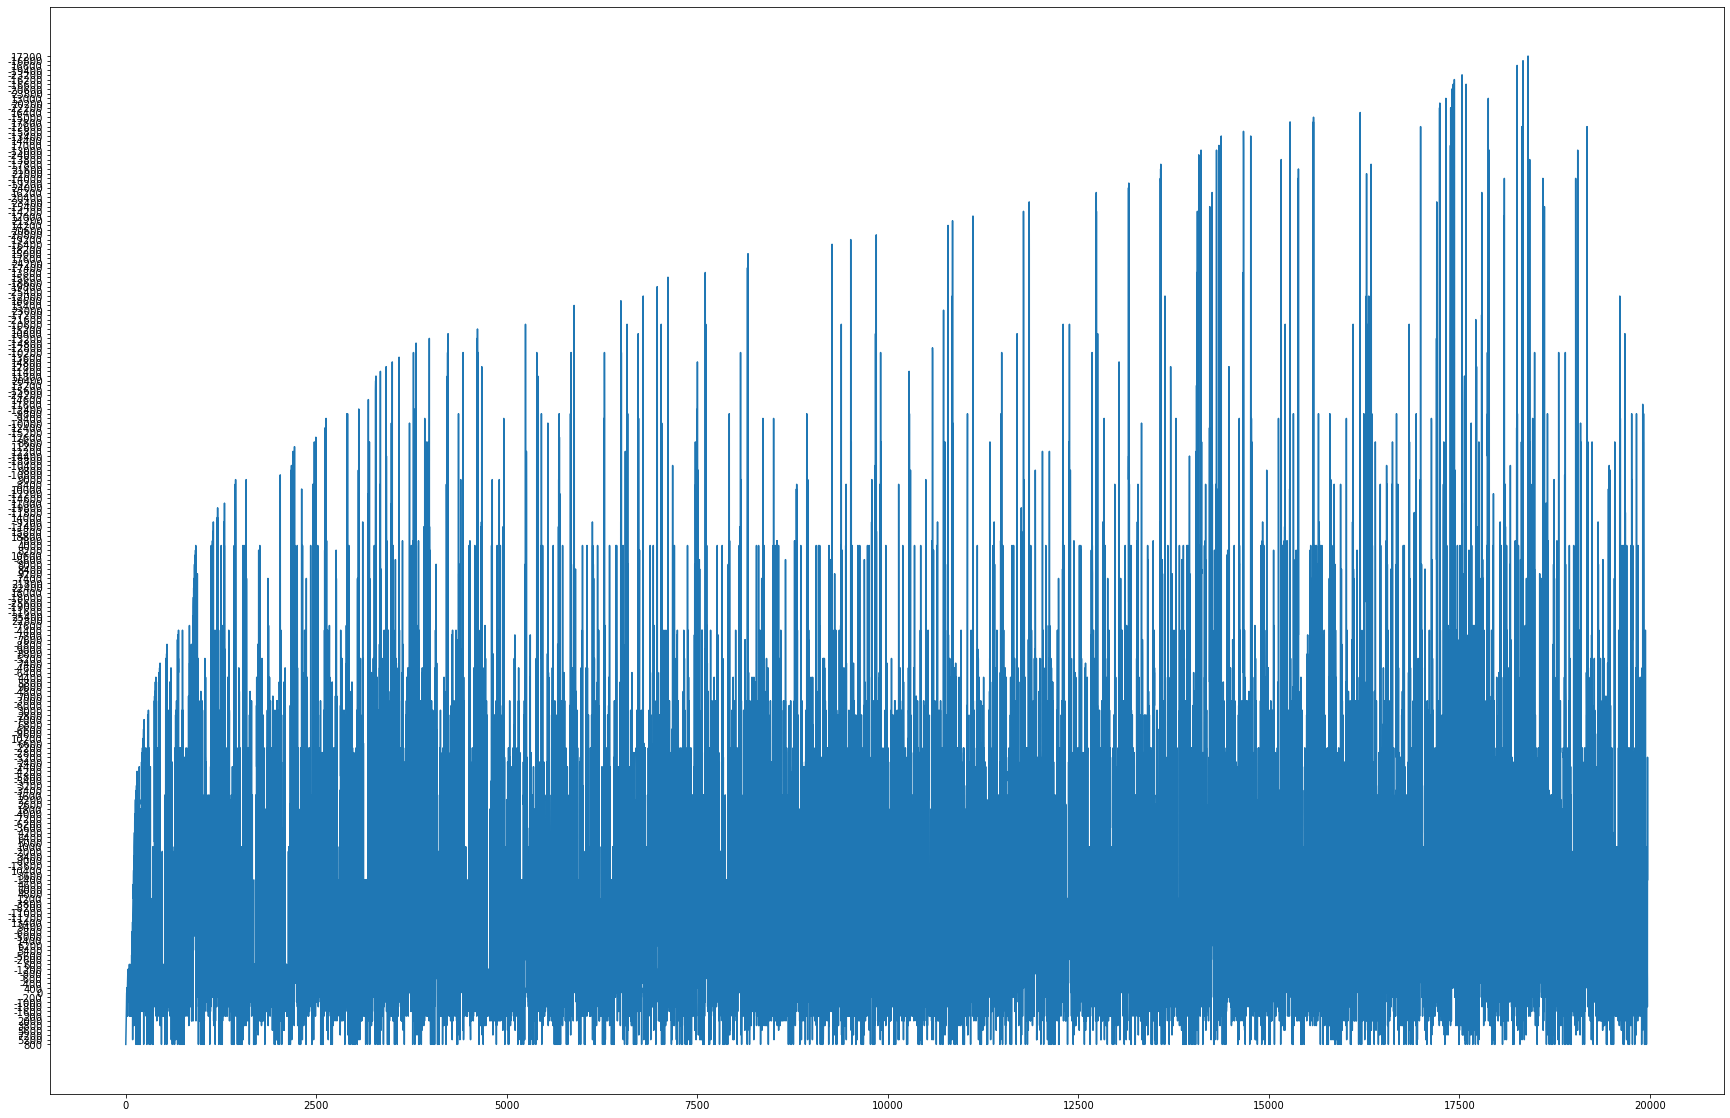

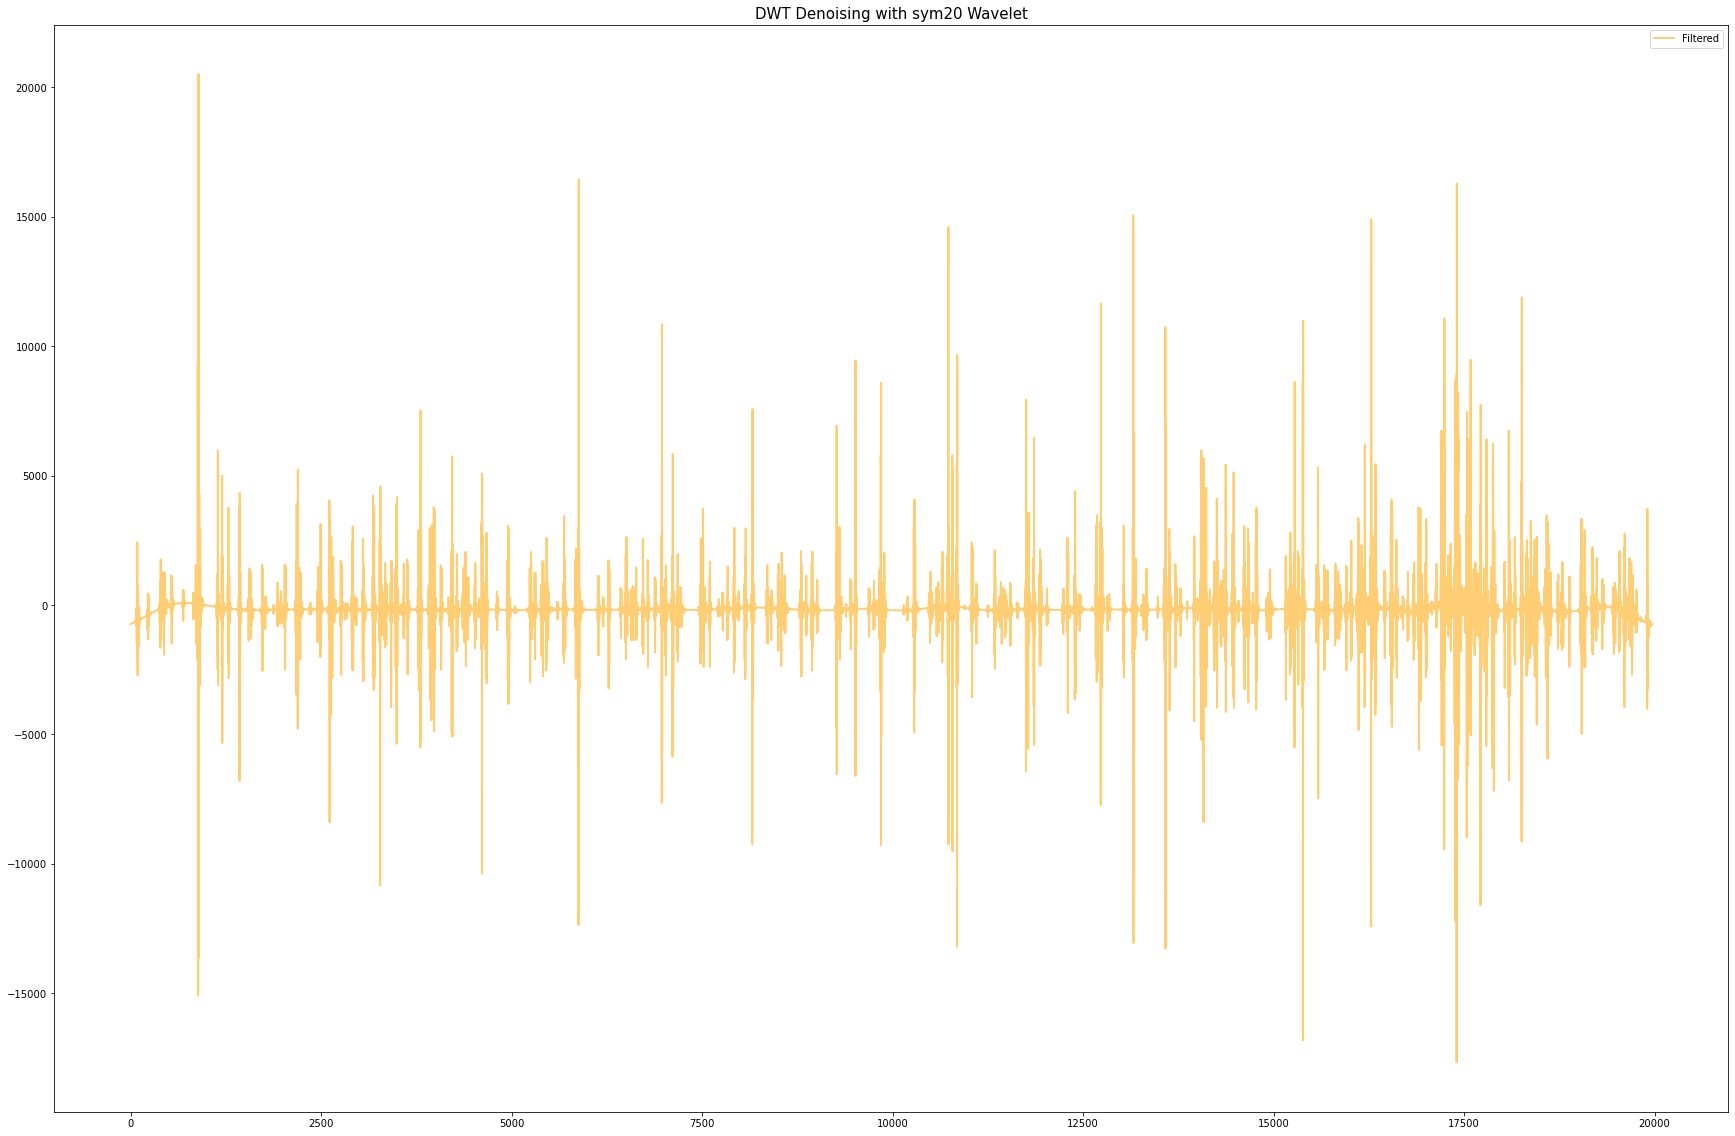

In [43]:
import pywt
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore")
overlapping = 0.550
columns = ["PCG"]
df = pd.read_csv('E:\Bhavya\KITSW\SEM 7\Major Project Phase 1\DataSet\PCG_P01_GW_36_1hour.csv', usecols=columns)
# n_times = 100
signal = df['PCG'][10:19982].values
plt.figure(figsize=(30, 20))
plt.plot(signal)
plt.show()



def madev(d, axis=None):
    """ Mean absolute deviation of a signal """
    return np.mean(np.absolute(d - np.mean(d, axis)), axis)

def wavelet_denoising(x, wavelet='db4', level=2):
    coeff = pywt.wavedec(x, wavelet, mode="per")
    sigma = (1/1.1830127) * madev(coeff[-level])
    uthresh = sigma * np.sqrt(2 * np.log(len(x)))
    coeff[1:] = (pywt.threshold(i, value=uthresh, mode='soft') for i in coeff[1:])
    return pywt.waverec(coeff, wavelet, mode='per')

for wav in pywt.wavelist():
    try:
        filtered3 = wavelet_denoising(signal, wavelet=wav, level=2)
#         plt.plot(filtered,label='Filtered', color='orange', linewidth = 2)
    except:
        pass
filtered3 = wavelet_denoising(signal, wavelet=wav, level=2)  
signal = df['PCG'][10:19982].values
plt.figure(figsize=(30, 20))
# plt.plot(signal,label='Raw',color='blue',linewidth = 2, alpha = overlapping)
plt.plot(filtered3, label='Filtered', color='orange', linewidth = 2 , alpha = overlapping)
plt.legend()
plt.title(f"DWT Denoising with {wav} Wavelet", size=15)
plt.show()

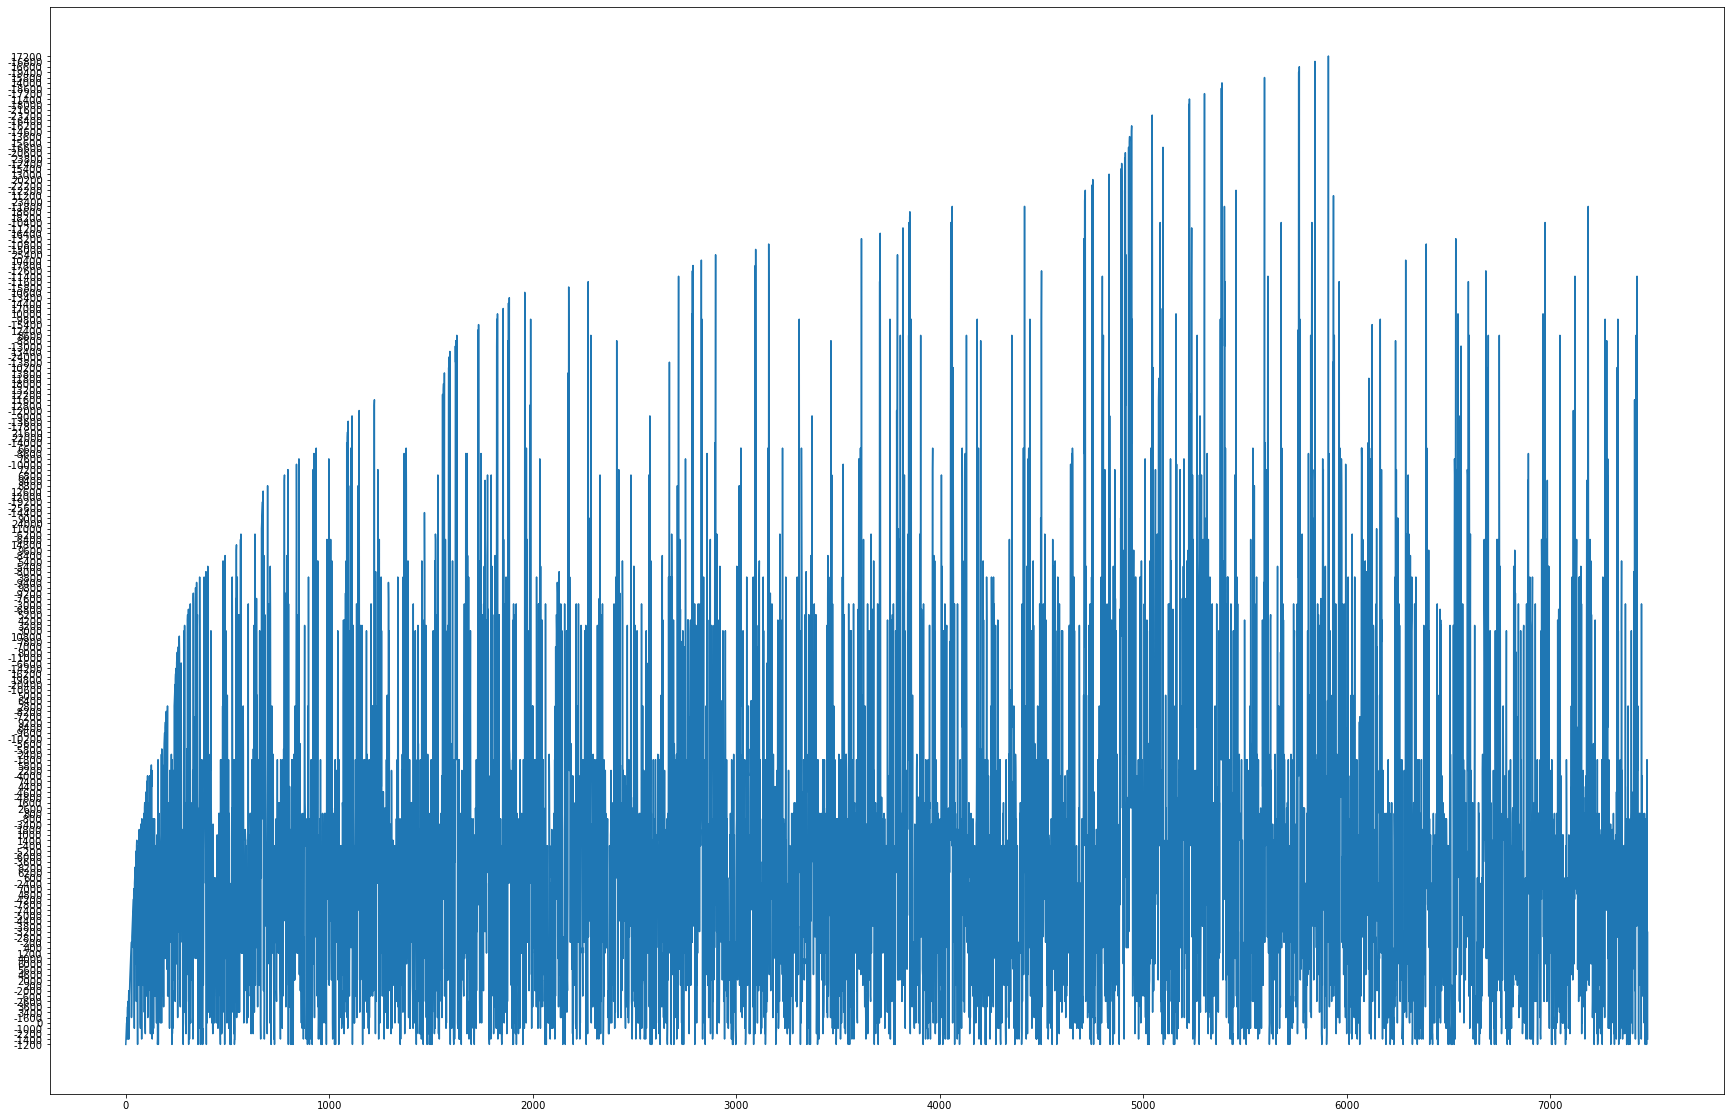

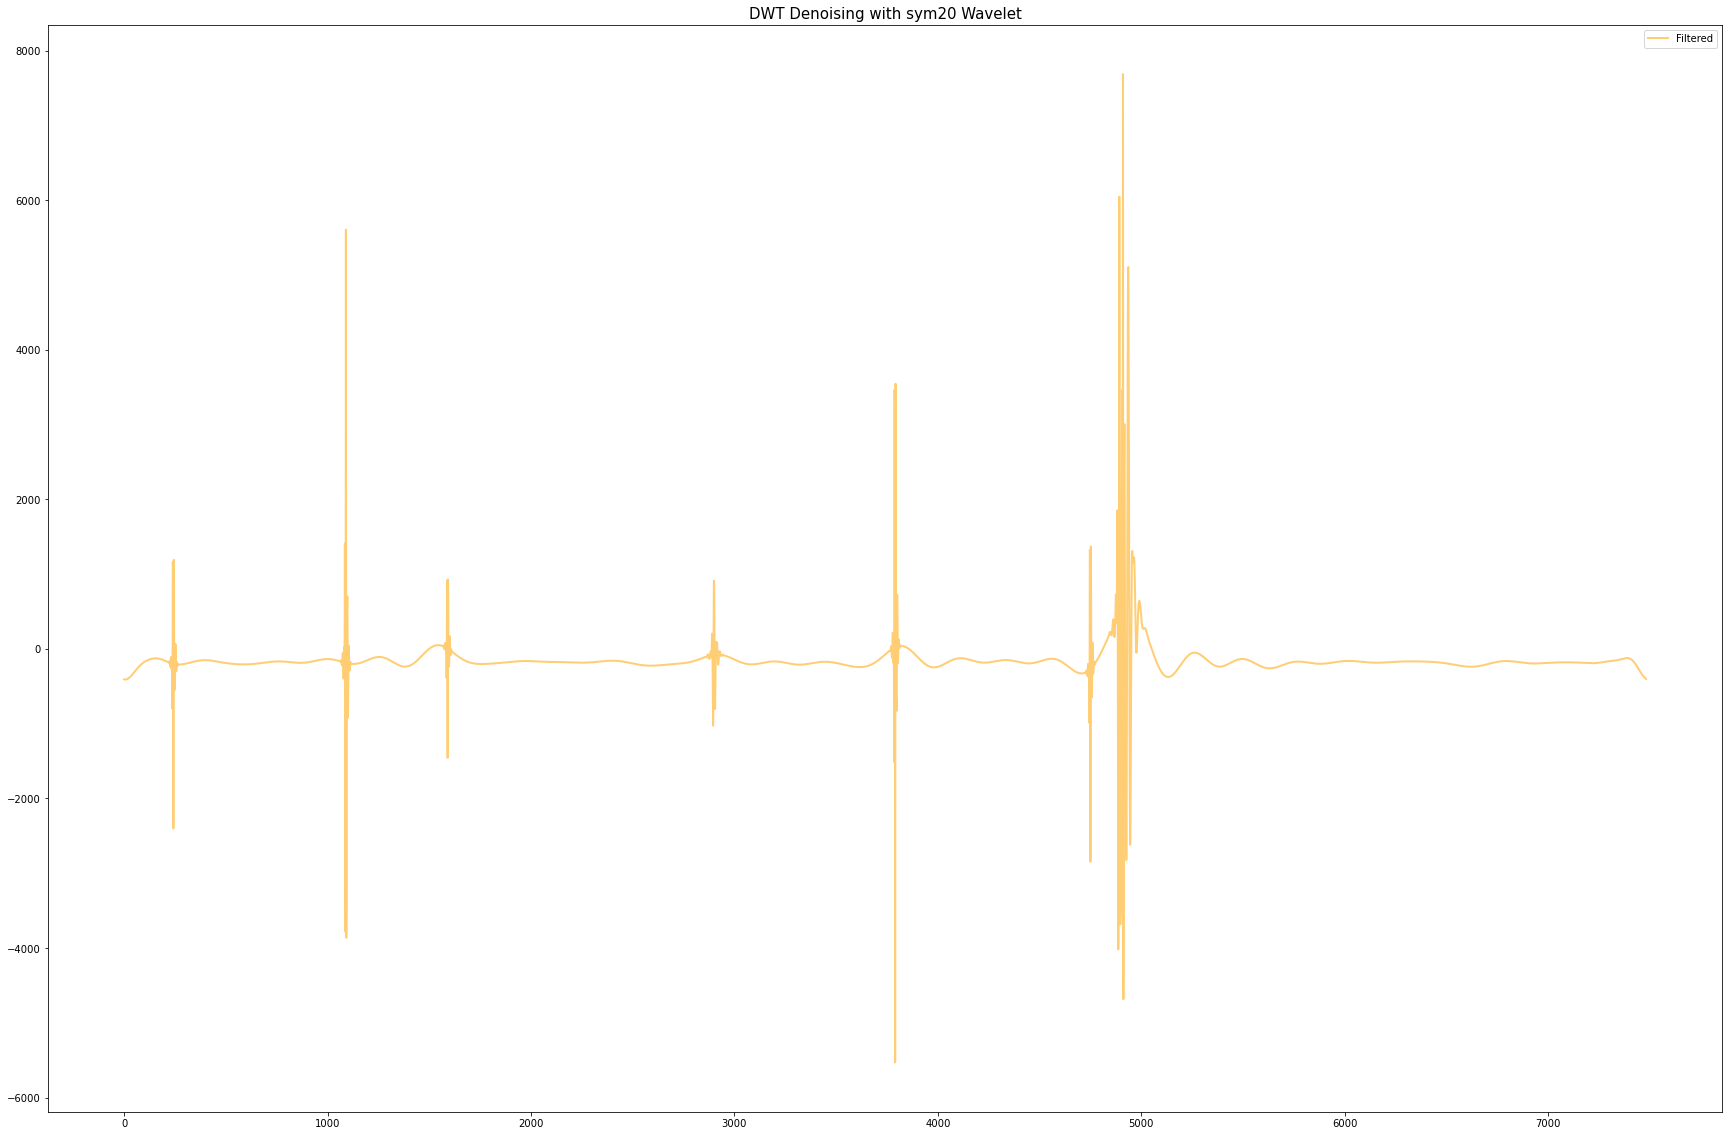

In [44]:
import pywt
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore")
overlapping = 0.550
columns = ["PCG"]
df = pd.read_csv('E:\Bhavya\KITSW\SEM 7\Major Project Phase 1\DataSet\PCG_P01_GW_36_1hour.csv', usecols=columns)
# n_times = 100
signal = df['PCG'][12500:19982].values
plt.figure(figsize=(30, 20))
plt.plot(signal)
plt.show()



def madev(d, axis=None):
    """ Mean absolute deviation of a signal """
    return np.mean(np.absolute(d - np.mean(d, axis)), axis)

def wavelet_denoising(x, wavelet='db6', level=1):
    coeff = pywt.wavedec(x, wavelet, mode="per")
    sigma = (1/0.47046721) * madev(coeff[-level])
    uthresh = sigma * np.sqrt(2 * np.log(len(x)))
    coeff[1:] = (pywt.threshold(i, value=uthresh, mode='soft') for i in coeff[1:])
    return pywt.waverec(coeff, wavelet, mode='per')

for wav in pywt.wavelist():
    try:
        filtered3 = wavelet_denoising(signal, wavelet=wav, level=2)
#         plt.plot(filtered,label='Filtered', color='orange', linewidth = 2)
    except:
        pass
filtered3 = wavelet_denoising(signal, wavelet=wav, level=2)  
signal = df['PCG'][12500:19982].values
plt.figure(figsize=(30, 20))
# plt.plot(signal,label='Raw',color='blue',linewidth = 2, alpha = overlapping)
plt.plot(filtered3, label='Filtered', color='orange', linewidth = 2 , alpha = overlapping)
plt.legend()
plt.title(f"DWT Denoising with {wav} Wavelet", size=15)
plt.show()

In [49]:
def myfilter(x):
    if x>0:
        return x
    else:
        return 0

a = list(filtered3)

In [52]:
a = list(map(lambda x: myfilter(x), a))

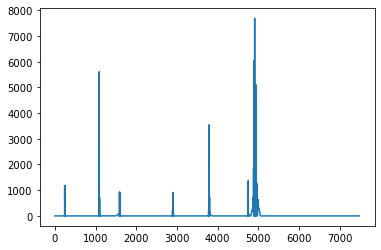

In [53]:
plt.plot(a)

In [56]:
filter_mean = np.mean(a)

def myfilter2(x):
    if x> filter_mean:
        return x
    else:
        return 0
    
a = list(map(lambda x: myfilter(x), a))

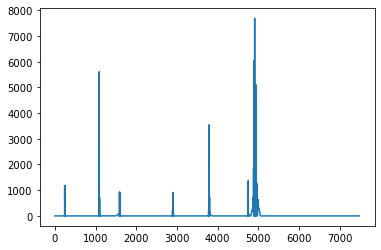

In [57]:
plt.plot(a)

{0,
 0.10838634750078822,
 1.2080061010552297,
 1.532883373737613,
 2.038410239514572,
 3.5966379312901724,
 3.7091578872976436,
 3.739783583698021,
 3.927754395593538,
 4.974859989683027,
 5.622730949755548,
 5.775705558418677,
 5.943030526083494,
 5.982300817749158,
 7.086399418445056,
 7.581569781454442,
 7.610433106629398,
 9.344672843162737,
 9.397114523107488,
 9.559032640686942,
 11.064360658006136,
 11.467835633459515,
 11.534449936897406,
 12.739999670806487,
 13.33616631130551,
 14.37097721872098,
 14.828600591044383,
 15.045765740595458,
 15.163367379672493,
 15.956701870227352,
 16.94880037276065,
 17.49660376849865,
 18.267767259195118,
 18.329327174673473,
 18.691846003576337,
 18.990134977925045,
 19.15367114452606,
 19.31243001238907,
 20.347690613369057,
 20.391904513839535,
 20.436769590090837,
 20.680898460036744,
 21.836004144340627,
 22.048396016080712,
 22.686102752339675,
 22.831769920863746,
 23.187359644349463,
 23.6607608290698,
 24.490379459917953,
 25.228459

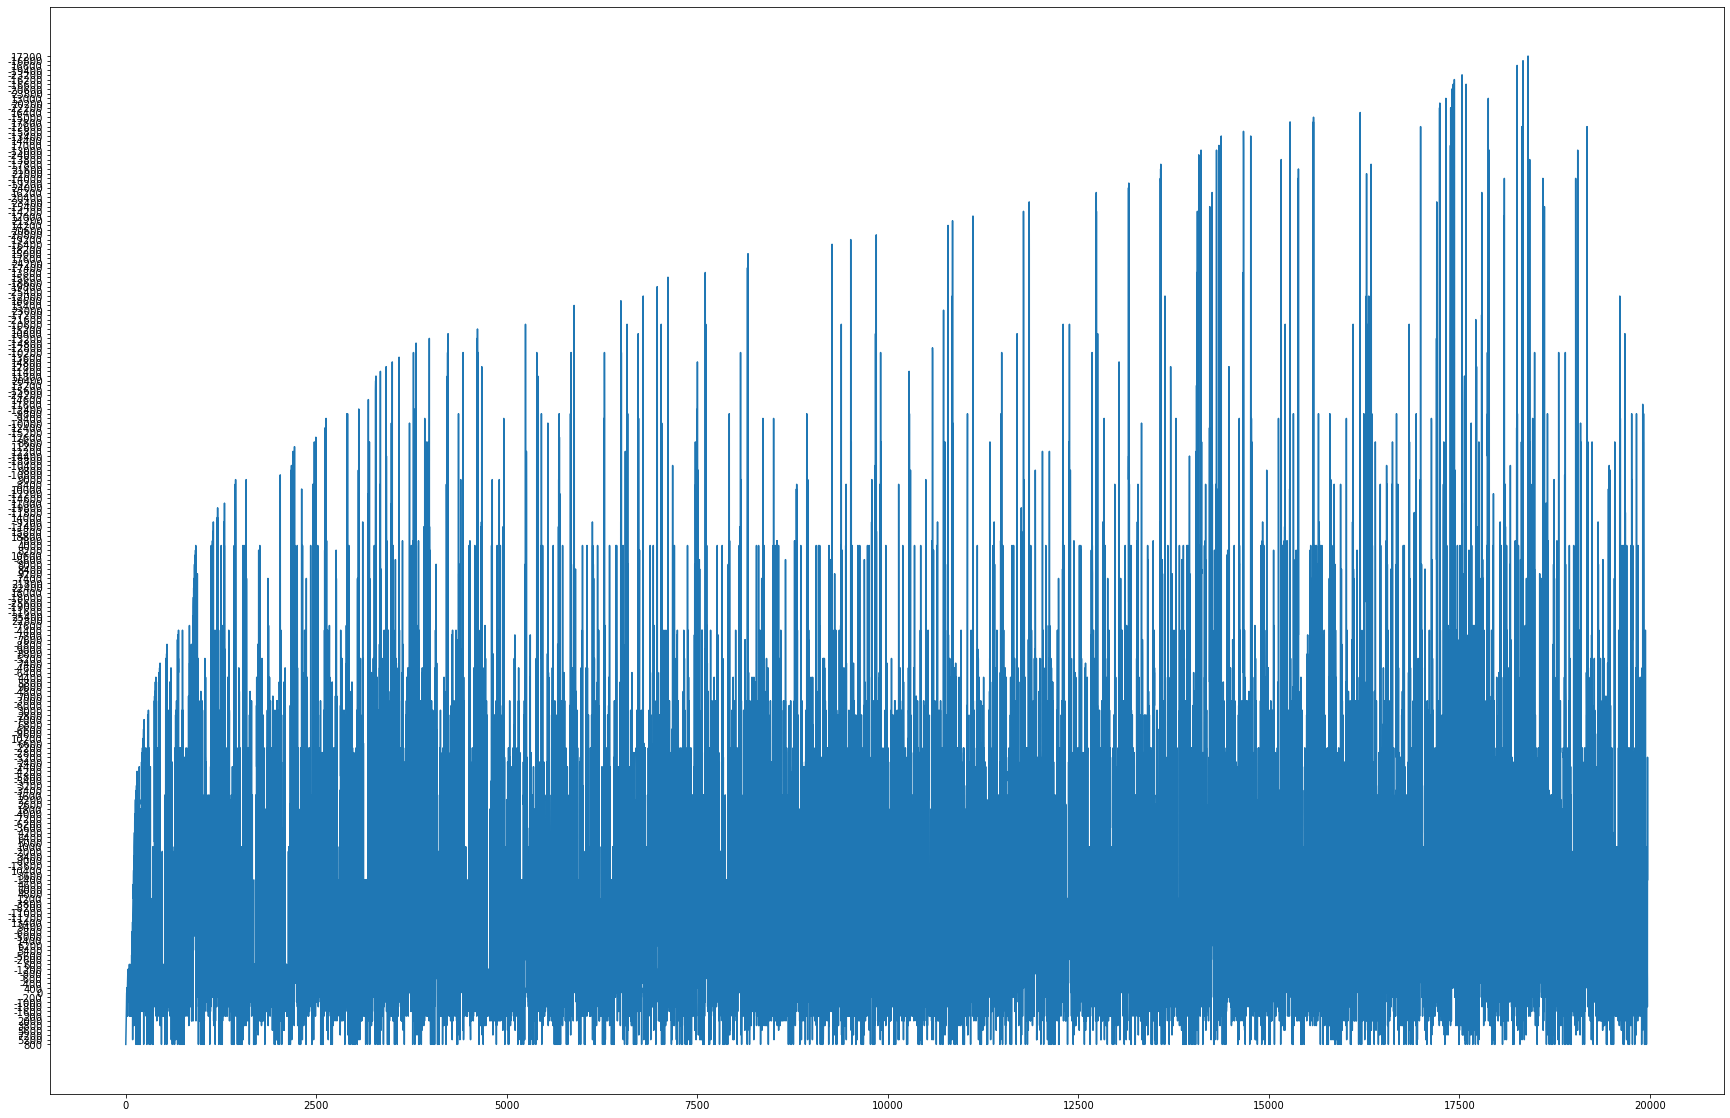

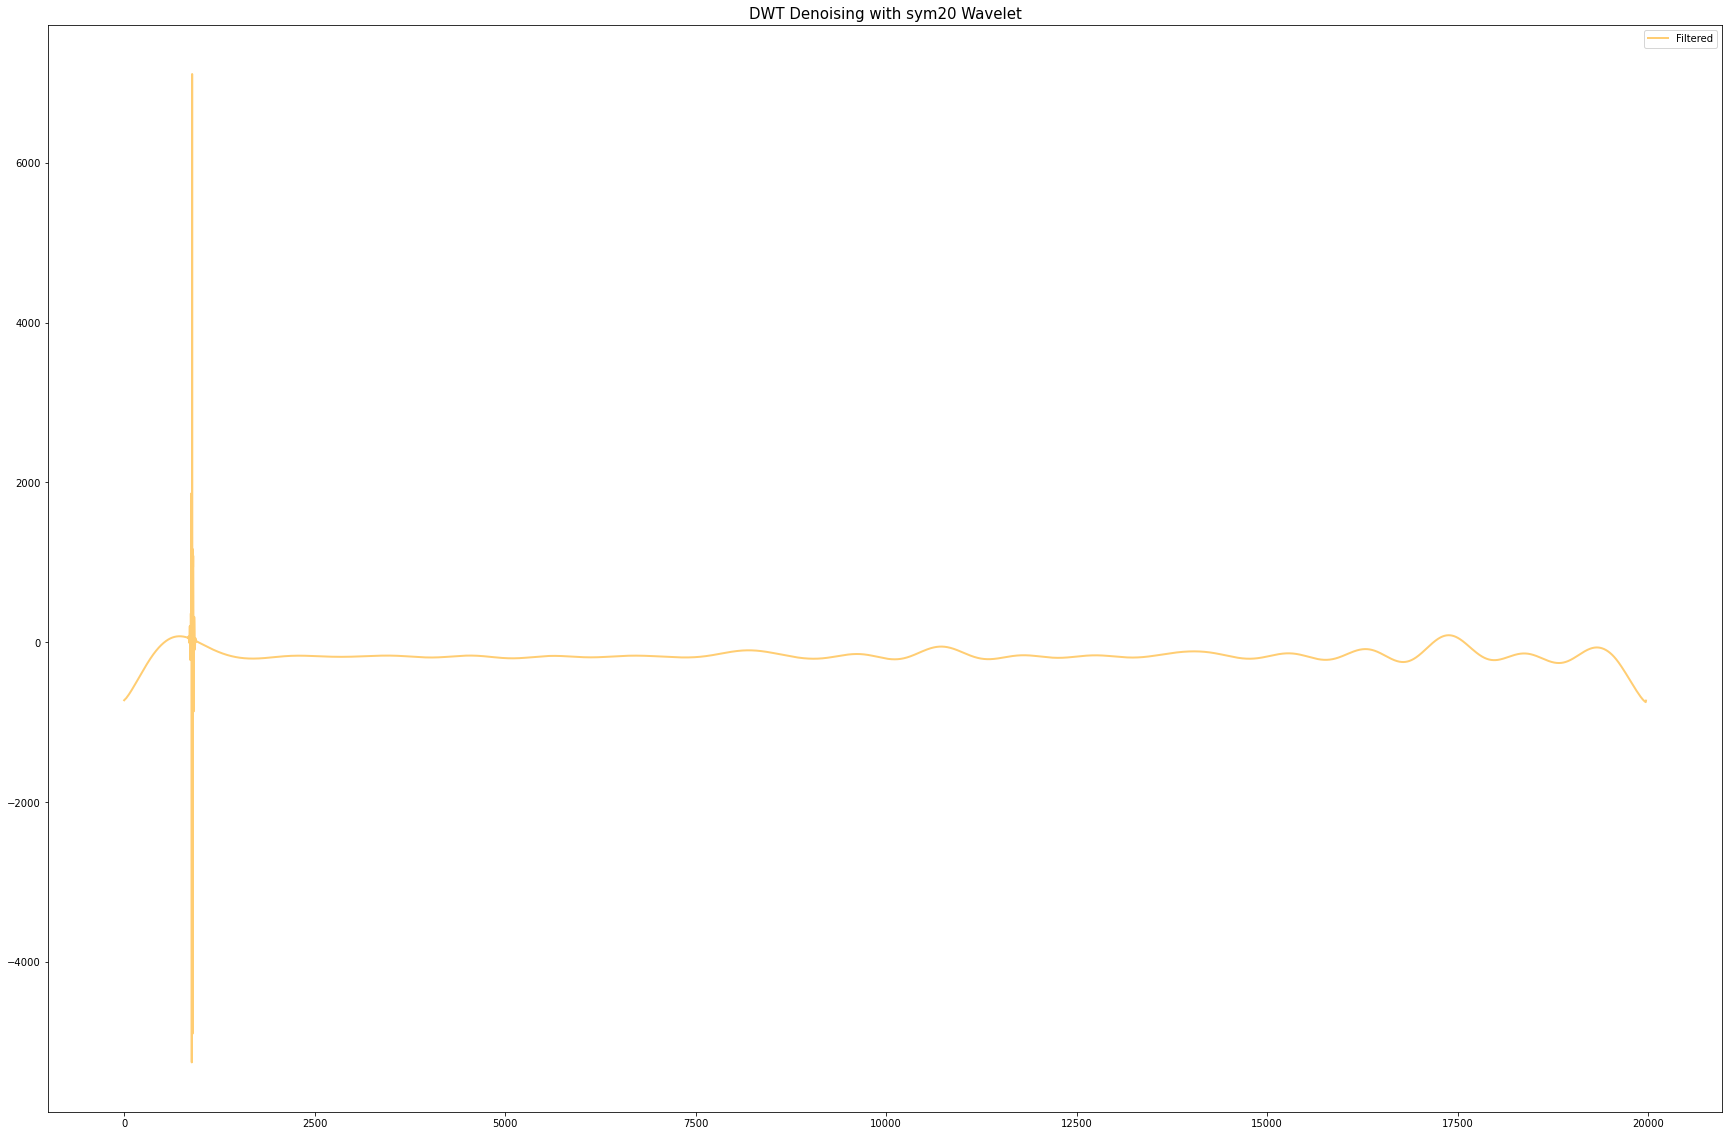

In [7]:
import pywt
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore")
overlapping = 0.550
columns = ["PCG"]
df = pd.read_csv('E:\Bhavya\KITSW\SEM 7\Major Project Phase 1\DataSet\PCG_P01_GW_36_1hour.csv', usecols=columns)
# n_times = 100
signal = df['PCG'][10:19982].values
plt.figure(figsize=(30, 20))
plt.plot(signal)
plt.show()



def madev(d, axis=None):
    """ Mean absolute deviation of a signal """
    return np.mean(np.absolute(d - np.mean(d, axis)), axis)

def wavelet_denoising(x, wavelet='db4', level=3):
    coeff = pywt.wavedec(x, wavelet, mode="per")
    sigma = (1/0.3169873) * madev(coeff[-level])
    uthresh = sigma * np.sqrt(2 * np.log(len(x)))
    coeff[1:] = (pywt.threshold(i, value=uthresh, mode='soft') for i in coeff[1:])
    return pywt.waverec(coeff, wavelet, mode='per')

for wav in pywt.wavelist():
    try:
        filtered3 = wavelet_denoising(signal, wavelet=wav, level=2)
#         plt.plot(filtered,label='Filtered', color='orange', linewidth = 2)
    except:
        pass
filtered3 = wavelet_denoising(signal, wavelet=wav, level=2)  
signal = df['PCG'][10:19982].values
plt.figure(figsize=(30, 20))
# plt.plot(signal,label='Raw',color='blue',linewidth = 2, alpha = overlapping)
plt.plot(filtered3, label='Filtered', color='orange', linewidth = 2 , alpha = overlapping)
plt.legend()
plt.title(f"DWT Denoising with {wav} Wavelet", size=15)
plt.show()